In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')


In [2]:
cust_df = pd.read_csv('./santander/train.csv', encoding='latin-1')
cust_test_df = pd.read_csv('./santander/test.csv')

In [3]:
cust_df.shape

(76020, 371)

In [4]:
cust_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()
print('unsatisfied 비율은 {:.2f}'.format(unsatisfied_cnt/total_cnt))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [7]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [8]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 17            7
 23            7
 25            6
 142           6
 154           6
 20            6
 31            6
 38            6
 153           5
 24            5
 91            5
           ...  
 225           1
 169           1
 41            1
 228           1
 101           1
 165           1
 229           1
 168           1
 108           1
 238           1
 184           1
 112           1
 76            1
 77            1
 205           1
 119           1
 79            1
 182           1
 181           1
 210           1
 40            1
 211           1
 84            1
 213           1
 178           1
 177           1
 87            1
 151          

In [9]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:,:-1]
y_label = cust_df.iloc[:,-1]

print('피쳐 데이터 shape:{0}'.format(X_features.shape))

피쳐 데이터 shape:(76020, 369)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape:{}, 테스트 세트 shape:{}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape:(60816, 369), 테스트 세트 shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


eval_set을 평가 데이터 셋으로 하지 않으면 어떻게 하나?

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [12]:
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_clf_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [13]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf_pred_proba, average='macro')
print('ROC AUC:{:.4f}'.format(xgb_roc_score))

ROC AUC:0.8419


In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
xgb_clf = XGBClassifier(n_estimators=100)

params = {
    'max_depth':[5,7],
    'min_child_weight':[1,3],
    'colsample_bytree':[0.5, 0.75]
}

grid_xgb_clf = GridSearchCV(xgb_clf, param_grid=params)
grid_xgb_clf.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',
                 eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802656	validation_1-auc:0.807919
[2]	validation_0-auc:0.80013	validation_1-auc:0.804948
[3]	validation_0-auc:0.805843	validation_1-auc:0.809844
[4]	validation_0-auc:0.814728	validation_1-auc:0.817554
[5]	validation_0-auc:0.80989	validation_1-auc:0.812919
[6]	validation_0-auc:0.80994	validation_1-auc:0.813688
[7]	validation_0-auc:0.818246	validation_1-auc:0.820487
[8]	validation_0-auc:0.821681	validation_1-auc:0.823214
[9]	validation_0-auc:0.819933	validation_1-auc:0.821108
[10]	validation_0-auc:0.825898	validation_1-auc:0.825134
[11]	validation_0-auc:0.829776	validation_1-auc:0.827521
[12]	validation_0-auc:0.832087	validation_1-auc:0.828878
[13]	validation_0-auc:0.83185	validation_1-auc:0.827989
[14]	validation_0-auc:0.830253	validation_1-auc:0.826429
[1

[50]	validation_0-auc:0.86211	validation_1-auc:0.842776
[51]	validation_0-auc:0.863213	validation_1-auc:0.843216
[52]	validation_0-auc:0.863963	validation_1-auc:0.844009
[53]	validation_0-auc:0.864482	validation_1-auc:0.844648
[54]	validation_0-auc:0.865133	validation_1-auc:0.844937
[55]	validation_0-auc:0.865492	validation_1-auc:0.844709
[56]	validation_0-auc:0.865993	validation_1-auc:0.844996
[57]	validation_0-auc:0.866332	validation_1-auc:0.845129
[58]	validation_0-auc:0.866537	validation_1-auc:0.844909
[59]	validation_0-auc:0.866757	validation_1-auc:0.844844
[60]	validation_0-auc:0.867255	validation_1-auc:0.844642
[61]	validation_0-auc:0.867647	validation_1-auc:0.844413
[62]	validation_0-auc:0.86778	validation_1-auc:0.844403
[63]	validation_0-auc:0.868042	validation_1-auc:0.844125
[64]	validation_0-auc:0.868285	validation_1-auc:0.844139
[65]	validation_0-auc:0.868816	validation_1-auc:0.844317
[66]	validation_0-auc:0.868901	validation_1-auc:0.844326
[67]	validation_0-auc:0.869074	va

[12]	validation_0-auc:0.832194	validation_1-auc:0.830867
[13]	validation_0-auc:0.832881	validation_1-auc:0.830585
[14]	validation_0-auc:0.83105	validation_1-auc:0.829088
[15]	validation_0-auc:0.834064	validation_1-auc:0.830594
[16]	validation_0-auc:0.836488	validation_1-auc:0.832439
[17]	validation_0-auc:0.838566	validation_1-auc:0.834435
[18]	validation_0-auc:0.841291	validation_1-auc:0.836339
[19]	validation_0-auc:0.840159	validation_1-auc:0.835519
[20]	validation_0-auc:0.841893	validation_1-auc:0.836441
[21]	validation_0-auc:0.841405	validation_1-auc:0.836036
[22]	validation_0-auc:0.840321	validation_1-auc:0.834835
[23]	validation_0-auc:0.84251	validation_1-auc:0.837768
[24]	validation_0-auc:0.844119	validation_1-auc:0.839223
[25]	validation_0-auc:0.84386	validation_1-auc:0.83757
[26]	validation_0-auc:0.843624	validation_1-auc:0.836767
[27]	validation_0-auc:0.845274	validation_1-auc:0.838187
[28]	validation_0-auc:0.846582	validation_1-auc:0.839603
[29]	validation_0-auc:0.84632	valid

[66]	validation_0-auc:0.866101	validation_1-auc:0.844762
[67]	validation_0-auc:0.866303	validation_1-auc:0.844544
[68]	validation_0-auc:0.866493	validation_1-auc:0.844325
[69]	validation_0-auc:0.866651	validation_1-auc:0.844105
[70]	validation_0-auc:0.866761	validation_1-auc:0.84405
[71]	validation_0-auc:0.866972	validation_1-auc:0.844211
[72]	validation_0-auc:0.867151	validation_1-auc:0.844122
[73]	validation_0-auc:0.867376	validation_1-auc:0.844185
[74]	validation_0-auc:0.867442	validation_1-auc:0.844186
[75]	validation_0-auc:0.867606	validation_1-auc:0.84417
[76]	validation_0-auc:0.86786	validation_1-auc:0.844023
[77]	validation_0-auc:0.86797	validation_1-auc:0.844189
[78]	validation_0-auc:0.868345	validation_1-auc:0.844065
[79]	validation_0-auc:0.868528	validation_1-auc:0.844039
[80]	validation_0-auc:0.868618	validation_1-auc:0.844043
[81]	validation_0-auc:0.868874	validation_1-auc:0.844012
[82]	validation_0-auc:0.869039	validation_1-auc:0.84399
[83]	validation_0-auc:0.869377	valid

[16]	validation_0-auc:0.848975	validation_1-auc:0.835177
[17]	validation_0-auc:0.851268	validation_1-auc:0.836379
[18]	validation_0-auc:0.853478	validation_1-auc:0.836386
[19]	validation_0-auc:0.852335	validation_1-auc:0.835925
[20]	validation_0-auc:0.855544	validation_1-auc:0.836983
[21]	validation_0-auc:0.855553	validation_1-auc:0.836397
[22]	validation_0-auc:0.855033	validation_1-auc:0.834445
[23]	validation_0-auc:0.856963	validation_1-auc:0.836413
[24]	validation_0-auc:0.85907	validation_1-auc:0.838012
[25]	validation_0-auc:0.859496	validation_1-auc:0.836454
[26]	validation_0-auc:0.860395	validation_1-auc:0.836356
[27]	validation_0-auc:0.862315	validation_1-auc:0.837705
[28]	validation_0-auc:0.864206	validation_1-auc:0.837761
[29]	validation_0-auc:0.863938	validation_1-auc:0.837658
[30]	validation_0-auc:0.865498	validation_1-auc:0.83833
[31]	validation_0-auc:0.866862	validation_1-auc:0.839237
[32]	validation_0-auc:0.86727	validation_1-auc:0.837928
[33]	validation_0-auc:0.86829	vali

[95]	validation_0-auc:0.894718	validation_1-auc:0.841673
Stopping. Best iteration:
[65]	validation_0-auc:0.888902	validation_1-auc:0.843524

[0]	validation_0-auc:0.736837	validation_1-auc:0.734096
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822074	validation_1-auc:0.815712
[2]	validation_0-auc:0.814373	validation_1-auc:0.806888
[3]	validation_0-auc:0.828324	validation_1-auc:0.821214
[4]	validation_0-auc:0.832905	validation_1-auc:0.825577
[5]	validation_0-auc:0.82953	validation_1-auc:0.822776
[6]	validation_0-auc:0.830211	validation_1-auc:0.822255
[7]	validation_0-auc:0.833664	validation_1-auc:0.825988
[8]	validation_0-auc:0.839	validation_1-auc:0.82913
[9]	validation_0-auc:0.838751	validation_1-auc:0.828431
[10]	validation_0-auc:0.843419	validation_1-auc:0.830844
[11]	validation_0-auc:0.845813	validation_1-auc:0.833661
[12]	validation_0-auc:0.847898	va

[45]	validation_0-auc:0.870867	validation_1-auc:0.836073
[46]	validation_0-auc:0.872491	validation_1-auc:0.836406
[47]	validation_0-auc:0.873587	validation_1-auc:0.837012
[48]	validation_0-auc:0.873936	validation_1-auc:0.83661
[49]	validation_0-auc:0.874852	validation_1-auc:0.836541
[50]	validation_0-auc:0.87495	validation_1-auc:0.835912
[51]	validation_0-auc:0.875651	validation_1-auc:0.836387
[52]	validation_0-auc:0.876333	validation_1-auc:0.836816
[53]	validation_0-auc:0.876628	validation_1-auc:0.837388
[54]	validation_0-auc:0.877094	validation_1-auc:0.837832
[55]	validation_0-auc:0.877855	validation_1-auc:0.83797
[56]	validation_0-auc:0.87859	validation_1-auc:0.838514
[57]	validation_0-auc:0.878867	validation_1-auc:0.838492
[58]	validation_0-auc:0.87909	validation_1-auc:0.838433
[59]	validation_0-auc:0.879142	validation_1-auc:0.838469
[60]	validation_0-auc:0.879478	validation_1-auc:0.83843
[61]	validation_0-auc:0.879742	validation_1-auc:0.838421
Stopping. Best iteration:
[31]	valida

[21]	validation_0-auc:0.856136	validation_1-auc:0.837891
[22]	validation_0-auc:0.85573	validation_1-auc:0.837673
[23]	validation_0-auc:0.857501	validation_1-auc:0.837776
[24]	validation_0-auc:0.858376	validation_1-auc:0.83902
[25]	validation_0-auc:0.858584	validation_1-auc:0.838329
[26]	validation_0-auc:0.858925	validation_1-auc:0.837917
[27]	validation_0-auc:0.859719	validation_1-auc:0.839459
[28]	validation_0-auc:0.861408	validation_1-auc:0.839827
[29]	validation_0-auc:0.861979	validation_1-auc:0.839394
[30]	validation_0-auc:0.863815	validation_1-auc:0.840433
[31]	validation_0-auc:0.865709	validation_1-auc:0.841593
[32]	validation_0-auc:0.865927	validation_1-auc:0.839924
[33]	validation_0-auc:0.866076	validation_1-auc:0.839817
[34]	validation_0-auc:0.865947	validation_1-auc:0.839194
[35]	validation_0-auc:0.867983	validation_1-auc:0.840204
[36]	validation_0-auc:0.869748	validation_1-auc:0.840745
[37]	validation_0-auc:0.869883	validation_1-auc:0.840638
[38]	validation_0-auc:0.869663	va

[64]	validation_0-auc:0.868086	validation_1-auc:0.838147
[65]	validation_0-auc:0.868253	validation_1-auc:0.838083
[66]	validation_0-auc:0.86836	validation_1-auc:0.838071
Stopping. Best iteration:
[36]	validation_0-auc:0.855359	validation_1-auc:0.840182

[0]	validation_0-auc:0.808752	validation_1-auc:0.799538
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.814155	validation_1-auc:0.808631
[2]	validation_0-auc:0.822097	validation_1-auc:0.818521
[3]	validation_0-auc:0.824996	validation_1-auc:0.821016
[4]	validation_0-auc:0.825963	validation_1-auc:0.822125
[5]	validation_0-auc:0.828318	validation_1-auc:0.821873
[6]	validation_0-auc:0.830602	validation_1-auc:0.821908
[7]	validation_0-auc:0.831274	validation_1-auc:0.822271
[8]	validation_0-auc:0.832728	validation_1-auc:0.823545
[9]	validation_0-auc:0.834143	validation_1-auc:0.824065
[10]	validation_0-auc:0.83516

[35]	validation_0-auc:0.856007	validation_1-auc:0.840675
[36]	validation_0-auc:0.856613	validation_1-auc:0.84121
[37]	validation_0-auc:0.85704	validation_1-auc:0.841175
[38]	validation_0-auc:0.858183	validation_1-auc:0.84155
[39]	validation_0-auc:0.858743	validation_1-auc:0.842177
[40]	validation_0-auc:0.859182	validation_1-auc:0.842212
[41]	validation_0-auc:0.859824	validation_1-auc:0.842693
[42]	validation_0-auc:0.860398	validation_1-auc:0.842827
[43]	validation_0-auc:0.860834	validation_1-auc:0.84255
[44]	validation_0-auc:0.861246	validation_1-auc:0.842194
[45]	validation_0-auc:0.861927	validation_1-auc:0.842308
[46]	validation_0-auc:0.862073	validation_1-auc:0.842397
[47]	validation_0-auc:0.862353	validation_1-auc:0.842439
[48]	validation_0-auc:0.862928	validation_1-auc:0.842538
[49]	validation_0-auc:0.863425	validation_1-auc:0.8424
[50]	validation_0-auc:0.864056	validation_1-auc:0.842676
[51]	validation_0-auc:0.864357	validation_1-auc:0.842524
[52]	validation_0-auc:0.864609	valida

Stopping. Best iteration:
[52]	validation_0-auc:0.860766	validation_1-auc:0.840366

[0]	validation_0-auc:0.811089	validation_1-auc:0.810522
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.816145	validation_1-auc:0.80958
[2]	validation_0-auc:0.823006	validation_1-auc:0.815162
[3]	validation_0-auc:0.826799	validation_1-auc:0.820588
[4]	validation_0-auc:0.828171	validation_1-auc:0.822185
[5]	validation_0-auc:0.830317	validation_1-auc:0.821841
[6]	validation_0-auc:0.831526	validation_1-auc:0.82214
[7]	validation_0-auc:0.833025	validation_1-auc:0.823823
[8]	validation_0-auc:0.833822	validation_1-auc:0.824124
[9]	validation_0-auc:0.835479	validation_1-auc:0.825068
[10]	validation_0-auc:0.83707	validation_1-auc:0.82645
[11]	validation_0-auc:0.838077	validation_1-auc:0.828302
[12]	validation_0-auc:0.838651	validation_1-auc:0.828116
[13]	validation_0-auc:0.83997	va

[43]	validation_0-auc:0.858114	validation_1-auc:0.840437
[44]	validation_0-auc:0.8587	validation_1-auc:0.840393
[45]	validation_0-auc:0.859208	validation_1-auc:0.840227
[46]	validation_0-auc:0.859787	validation_1-auc:0.840334
[47]	validation_0-auc:0.860175	validation_1-auc:0.840495
[48]	validation_0-auc:0.860447	validation_1-auc:0.840604
[49]	validation_0-auc:0.860756	validation_1-auc:0.840793
[50]	validation_0-auc:0.8614	validation_1-auc:0.841389
[51]	validation_0-auc:0.861773	validation_1-auc:0.841365
[52]	validation_0-auc:0.861854	validation_1-auc:0.84153
[53]	validation_0-auc:0.862384	validation_1-auc:0.84149
[54]	validation_0-auc:0.862676	validation_1-auc:0.841725
[55]	validation_0-auc:0.862848	validation_1-auc:0.841829
[56]	validation_0-auc:0.863278	validation_1-auc:0.841768
[57]	validation_0-auc:0.86356	validation_1-auc:0.841612
[58]	validation_0-auc:0.86411	validation_1-auc:0.841675
[59]	validation_0-auc:0.864374	validation_1-auc:0.841882
[60]	validation_0-auc:0.864549	validati

[21]	validation_0-auc:0.862989	validation_1-auc:0.838228
[22]	validation_0-auc:0.86408	validation_1-auc:0.838505
[23]	validation_0-auc:0.864833	validation_1-auc:0.839339
[24]	validation_0-auc:0.865275	validation_1-auc:0.839364
[25]	validation_0-auc:0.867226	validation_1-auc:0.839368
[26]	validation_0-auc:0.868347	validation_1-auc:0.839987
[27]	validation_0-auc:0.868822	validation_1-auc:0.839718
[28]	validation_0-auc:0.869747	validation_1-auc:0.839315
[29]	validation_0-auc:0.870582	validation_1-auc:0.839963
[30]	validation_0-auc:0.871132	validation_1-auc:0.840295
[31]	validation_0-auc:0.871655	validation_1-auc:0.8402
[32]	validation_0-auc:0.872709	validation_1-auc:0.840605
[33]	validation_0-auc:0.873597	validation_1-auc:0.840609
[34]	validation_0-auc:0.874485	validation_1-auc:0.841155
[35]	validation_0-auc:0.875671	validation_1-auc:0.840878
[36]	validation_0-auc:0.876407	validation_1-auc:0.840645
[37]	validation_0-auc:0.877606	validation_1-auc:0.840808
[38]	validation_0-auc:0.878592	val

[23]	validation_0-auc:0.859264	validation_1-auc:0.838275
[24]	validation_0-auc:0.859998	validation_1-auc:0.839437
[25]	validation_0-auc:0.860713	validation_1-auc:0.839528
[26]	validation_0-auc:0.861887	validation_1-auc:0.839759
[27]	validation_0-auc:0.862421	validation_1-auc:0.839912
[28]	validation_0-auc:0.863272	validation_1-auc:0.839747
[29]	validation_0-auc:0.864173	validation_1-auc:0.839941
[30]	validation_0-auc:0.864581	validation_1-auc:0.840214
[31]	validation_0-auc:0.865165	validation_1-auc:0.840243
[32]	validation_0-auc:0.865982	validation_1-auc:0.839967
[33]	validation_0-auc:0.867174	validation_1-auc:0.840393
[34]	validation_0-auc:0.867784	validation_1-auc:0.84028
[35]	validation_0-auc:0.868347	validation_1-auc:0.839926
[36]	validation_0-auc:0.869124	validation_1-auc:0.839652
[37]	validation_0-auc:0.86975	validation_1-auc:0.83957
[38]	validation_0-auc:0.870294	validation_1-auc:0.839306
[39]	validation_0-auc:0.870689	validation_1-auc:0.83959
[40]	validation_0-auc:0.871538	vali

[0]	validation_0-auc:0.822547	validation_1-auc:0.816922
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828707	validation_1-auc:0.82115
[2]	validation_0-auc:0.831882	validation_1-auc:0.821944
[3]	validation_0-auc:0.834654	validation_1-auc:0.82446
[4]	validation_0-auc:0.835563	validation_1-auc:0.825211
[5]	validation_0-auc:0.839081	validation_1-auc:0.827422
[6]	validation_0-auc:0.840656	validation_1-auc:0.828467
[7]	validation_0-auc:0.840958	validation_1-auc:0.829569
[8]	validation_0-auc:0.842797	validation_1-auc:0.830023
[9]	validation_0-auc:0.844924	validation_1-auc:0.832305
[10]	validation_0-auc:0.845608	validation_1-auc:0.831611
[11]	validation_0-auc:0.84683	validation_1-auc:0.832827
[12]	validation_0-auc:0.848602	validation_1-auc:0.832492
[13]	validation_0-auc:0.851937	validation_1-auc:0.834248
[14]	validation_0-auc:0.852856	validation_1-auc:0.834055
[

[48]	validation_0-auc:0.898112	validation_1-auc:0.843112
[49]	validation_0-auc:0.898969	validation_1-auc:0.843815
[50]	validation_0-auc:0.899723	validation_1-auc:0.843616
[51]	validation_0-auc:0.900311	validation_1-auc:0.843351
[52]	validation_0-auc:0.90076	validation_1-auc:0.843224
[53]	validation_0-auc:0.901219	validation_1-auc:0.843209
[54]	validation_0-auc:0.901953	validation_1-auc:0.84299
[55]	validation_0-auc:0.902292	validation_1-auc:0.843091
[56]	validation_0-auc:0.902796	validation_1-auc:0.842737
[57]	validation_0-auc:0.903409	validation_1-auc:0.842502
[58]	validation_0-auc:0.904051	validation_1-auc:0.842664
[59]	validation_0-auc:0.904293	validation_1-auc:0.842771
[60]	validation_0-auc:0.904655	validation_1-auc:0.842501
[61]	validation_0-auc:0.904978	validation_1-auc:0.842503
[62]	validation_0-auc:0.905361	validation_1-auc:0.8426
[63]	validation_0-auc:0.906145	validation_1-auc:0.842635
[64]	validation_0-auc:0.90649	validation_1-auc:0.842556
[65]	validation_0-auc:0.907426	valid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [5, 7],
                         'min_child_weight': [1, 3]},
             pre_dispatch='2*

In [16]:
print('GridSearchCV 최적 파라미터:', grid_xgb_clf.best_params_)

grid_xgb_clf_pred_proba = grid_xgb_clf.predict_proba(X_test)[:,1]
grid_xgb_clf_roc_score = roc_auc_score(y_test, grid_xgb_clf_pred_proba, average='micro')
print('ROC AUC: {:.4f}'.format(grid_xgb_clf_roc_score))

GridSearchCV 최적 파라미터: {'colsample_bytree': 0.75, 'max_depth': 7, 'min_child_weight': 1}
ROC AUC: 0.8448


In [17]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.2, max_depth=7,
                       min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc',
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.832323	validation_1-auc:0.820413
[2]	validation_0-auc:0.83662	validation_1-auc:0.824408
[3]	validation_0-auc:0.84621	validation_1-auc:0.831175
[4]	validation_0-auc:0.850518	validation_1-auc:0.83127
[5]	validation_0-auc:0.854345	validation_1-auc:0.835093
[6]	validation_0-auc:0.857743	validation_1-auc:0.834957
[7]	validation_0-auc:0.859735	validation_1-auc:0.836509
[8]	validation_0-auc:0.86277	validation_1-auc:0.837399
[9]	validation_0-auc:0.865509	validation_1-auc:0.837387
[10]	validation_0-auc:0.868146	validation_1-auc:0.837385
[11]	validation_0-auc:0.868774	validation_1-auc:0.836084
[12]	validation_0-auc:0.873094	validation_1-auc:0.836915
[13]	validation_0-auc:0.876664	validation_1-auc:0.838283
[14]	validation_0-auc:0.878035	validation_1-auc:0.840653
[1

[142]	validation_0-auc:0.945188	validation_1-auc:0.834359
[143]	validation_0-auc:0.94535	validation_1-auc:0.834098
[144]	validation_0-auc:0.945628	validation_1-auc:0.834412
[145]	validation_0-auc:0.945695	validation_1-auc:0.834351
[146]	validation_0-auc:0.945803	validation_1-auc:0.834021
[147]	validation_0-auc:0.945828	validation_1-auc:0.834084
[148]	validation_0-auc:0.945866	validation_1-auc:0.834313
[149]	validation_0-auc:0.945934	validation_1-auc:0.834123
[150]	validation_0-auc:0.945957	validation_1-auc:0.83407
[151]	validation_0-auc:0.945981	validation_1-auc:0.834075
[152]	validation_0-auc:0.946106	validation_1-auc:0.834
[153]	validation_0-auc:0.946563	validation_1-auc:0.834054
[154]	validation_0-auc:0.946841	validation_1-auc:0.833982
[155]	validation_0-auc:0.947292	validation_1-auc:0.833777
[156]	validation_0-auc:0.947663	validation_1-auc:0.833559
[157]	validation_0-auc:0.947746	validation_1-auc:0.833299
[158]	validation_0-auc:0.947976	validation_1-auc:0.83319
[159]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.75, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=156,
              reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [18]:
xgb_clf_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

xgb_roc_auc_score = roc_auc_score(y_test, xgb_clf_pred_proba, average='micro')
print('ROC AUC: {:.4f}'.format(xgb_roc_auc_score))

ROC AUC: 0.8431


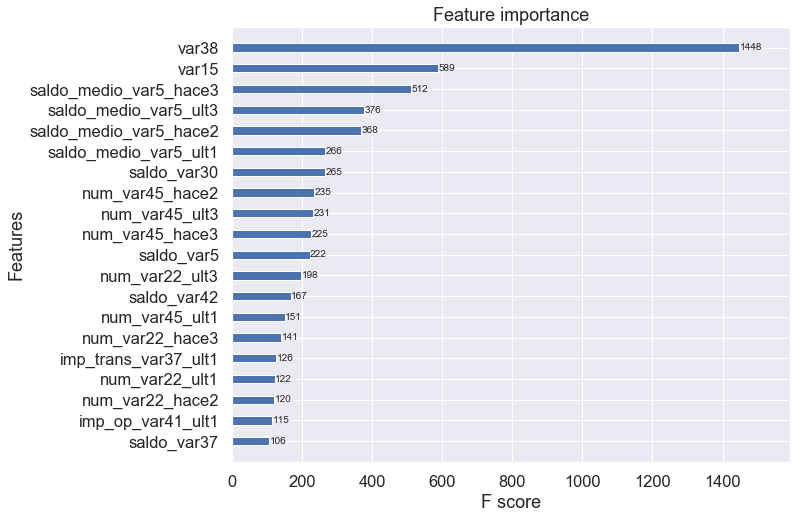

In [19]:
from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)


In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimator=500, n_jobs=-1)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimator=500, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [21]:
lgbm_clf_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
lgbm_clf_roc_score = roc_auc_score(y_test, lgbm_clf_pred_proba, average='micro')
print('ROC AUC: {:.4f}'.format(lgbm_clf_roc_score))

ROC AUC: 0.8396


In [30]:
lgbm_clf = LGBMClassifier(n_estimator=200)

params = {
    'num_leaves': [32, 64],
    'max_depth': [128, 160],
    'min_child_samples': [60,100],
    'subsample':[0.88, 1]
}

grid_clf = GridSearchCV(lgbm_clf, param_grid = params, n_jobs=-1)
grid_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
             eval_set=[(X_train, y_train), (X_test, y_test)])



[1]	training's auc: 0.824305	training's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.828884	training's binary_logloss: 0.150957	valid_1's auc: 0.822387	valid_1's binary_logloss: 0.159711
[3]	training's auc: 0.838845	training's binary_logloss: 0.147117	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.156068
[4]	training's auc: 0.843406	training's binary_logloss: 0.144114	valid_1's auc: 0.834917	valid_1's binary_logloss: 0.153141
[5]	training's auc: 0.846391	training's binary_logloss: 0.141629	valid_1's auc: 0.837871	valid_1's binary_logloss: 0.150804
[6]	training's auc: 0.848894	training's binary_logloss: 0.13957	valid_1's auc: 0.839548	valid_1's binary_logloss: 0.148876
[7]	training's auc: 0.851133	training's binary_logloss: 0.137847	valid_1's auc: 0.841812	valid_1's binary_logloss: 0.147225
[8]	training's auc: 0.852859	training's binary_logloss: 0.136394	valid_

[79]	training's auc: 0.909238	training's binary_logloss: 0.11292	valid_1's auc: 0.840753	valid_1's binary_logloss: 0.138734
[80]	training's auc: 0.909738	training's binary_logloss: 0.112733	valid_1's auc: 0.840892	valid_1's binary_logloss: 0.138741
[81]	training's auc: 0.910022	training's binary_logloss: 0.112586	valid_1's auc: 0.841138	valid_1's binary_logloss: 0.138702
[82]	training's auc: 0.910557	training's binary_logloss: 0.112388	valid_1's auc: 0.841058	valid_1's binary_logloss: 0.138712
[83]	training's auc: 0.910902	training's binary_logloss: 0.112229	valid_1's auc: 0.84078	valid_1's binary_logloss: 0.138768
[84]	training's auc: 0.911106	training's binary_logloss: 0.112076	valid_1's auc: 0.84061	valid_1's binary_logloss: 0.138815
[85]	training's auc: 0.911292	training's binary_logloss: 0.111948	valid_1's auc: 0.840361	valid_1's binary_logloss: 0.138849
[86]	training's auc: 0.911418	training's binary_logloss: 0.111847	valid_1's auc: 0.840272	valid_1's binary_logloss: 0.138871
[87

In [34]:
grid_clf_pred_proba = grid_clf.predict_proba(X_test)[:,1]
print('GridSearchCV 최적 파라미터:', grid_clf.best_params_)
lgbm_roc_score = roc_auc_score(y_test, grid_clf_pred_proba, average='micro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.88}
ROC AUC: 0.8395


In [32]:
lgbm_clf = LGBMClassifier(n_estimator=1000, num_leabes=32, subsample=0.8,
                          min_child_samples=100, max_depth=128, n_jobs=-1)
evals=[(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, eval_metric='auc', eval_set=evals)


[1]	valid_0's auc: 0.819387	valid_0's binary_logloss: 0.165103
[2]	valid_0's auc: 0.822248	valid_0's binary_logloss: 0.159826
[3]	valid_0's auc: 0.829684	valid_0's binary_logloss: 0.156174
[4]	valid_0's auc: 0.834804	valid_0's binary_logloss: 0.153281
[5]	valid_0's auc: 0.837649	valid_0's binary_logloss: 0.150913
[6]	valid_0's auc: 0.838923	valid_0's binary_logloss: 0.148969
[7]	valid_0's auc: 0.839622	valid_0's binary_logloss: 0.147473
[8]	valid_0's auc: 0.840976	valid_0's binary_logloss: 0.146193
[9]	valid_0's auc: 0.84138	valid_0's binary_logloss: 0.145069
[10]	valid_0's auc: 0.841092	valid_0's binary_logloss: 0.144154
[11]	valid_0's auc: 0.840942	valid_0's binary_logloss: 0.143374
[12]	valid_0's auc: 0.84114	valid_0's binary_logloss: 0.142691
[13]	valid_0's auc: 0.841895	valid_0's binary_logloss: 0.142141
[14]	valid_0's auc: 0.84216	valid_0's binary_logloss: 0.141671
[15]	valid_0's auc: 0.842494	valid_0's binary_logloss: 0.141215
[16]	valid_0's auc: 0.842069	valid_0's binary_loglos

In [33]:
lgbm_clf_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf_pred_proba, average='micro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8394


In [42]:
X_test.shape

(15204, 369)

In [43]:
cust_test_df.shape

(75818, 370)

In [69]:
X_test.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [70]:
different = cust_test_df[cust_test_df.columns.difference(X_test.columns)]

In [72]:
different.head()

,ID
0,2
1,5
2,6
3,7
4,9


In [74]:
cust_test_df_2= cust_test_df.drop('ID', axis=1)

In [75]:
cust_test_df_2.shape

(75818, 369)

In [76]:
lgbm_clf.predict_proba(cust_test_df_2)

array([[9.65729956e-01, 3.42700444e-02],
       [9.51710919e-01, 4.82890807e-02],
       [9.98873100e-01, 1.12689958e-03],
       ...,
       [9.96806379e-01, 3.19362059e-03],
       [9.29204286e-01, 7.07957136e-02],
       [9.99170971e-01, 8.29028510e-04]])

In [98]:
cust_pred = lgbm_clf.predict(cust_test_df_2)

In [99]:
pd.Series(cust_pred).value_counts()

0    75785
1       33
dtype: int64

In [35]:
submission = pd.read_csv('./santander/sample_submission.csv')

In [80]:
submission.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [81]:
submission['TARGET'] = cust_pred

In [101]:
submission['TARGET'].value_counts()

0    75785
1       33
Name: TARGET, dtype: int64

In [102]:
submission.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [103]:
submission.to_csv('./santander_submission.csv', index=False)